In [24]:
from nbodykit.lab import *
import pandas as pd
import numpy as np

zmin, zmax = 0.01, 0.15

# Load your data and randoms as Pandas DataFrames
sdss = pd.read_csv('../data/sdss_zmin_0.000_zmax_0.300_sigma_5.0.csv')
sdss  = sdss[(sdss["red"] > zmin)&(sdss["red"] < zmax)]
randoms = pd.read_csv('../data/random_sample_healpy_128.csv')  # Replace with your randoms CSV file path

# Convert DataFrames to ArrayCatalog with RA, DEC, and Redshift
data_cat = ArrayCatalog({'RA': sdss['ra'].values,
                         'DEC': sdss['dec'].values,
                         'Redshift': sdss['red'].values})

rand_cat = ArrayCatalog({'RA': randoms['ra'].values,
                         'DEC': randoms['dec'].values,
                         'Redshift': randoms['red'].values})


# Assign cosmology (if not already in the data)
cosmo = cosmology.Planck15

# Define the edges for rp and pi bins
edges = np.linspace(10.,150.,10) 
pimax = 150. 

# Define the SurveyData2PCF object
result = SurveyData2PCF('projected', data_cat, rand_cat, edges=edges, pimax=pimax, cosmo=cosmo, ra='RA', dec='DEC', redshift='Redshift')


RuntimeError: calling the function 'Corrfunc.mocks.DDrppi_mocks.DDrppi_mocks' failed, likely due to issues with input data/parameters. Open at issue at https://github.com/bccp/nbodykit/issues for further help.
exception: RuntimeError occurred
stdout: 
stderr: Received signal = `Interrupt' (signo = 2). Aborting 


In [ ]:
# Access the computed correlation function
xi_rp_pi = result.corr.data  # 2D correlation function values
pi = result.corr.coords['pi']  # The s bins
rp = result.corr.coords['rp']  # The mu bins


# Optionally save the results to a file
np.savez('xi_rp_pi_results.npz', rp=rp, pi=pi, xi_rp_pr=xi_rp_pi)

xi_rp_pi_values shape: (9, 10)
rp bins: [12.22222222 16.66666667 21.11111111 25.55555556 30.         34.44444444
 38.88888889 43.33333333 47.77777778]
pi bins: [0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]


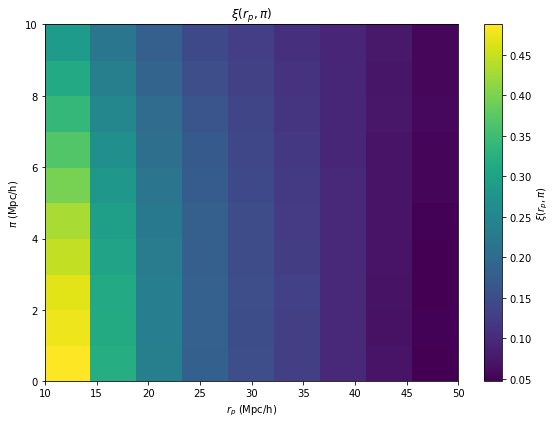

In [22]:
# Extract the 'corr' field for plotting
xi_rp_pi_values = xi_rp_pi['corr']

# Confirm the extracted array is numeric and has the correct shape
print("xi_rp_pi_values shape:", xi_rp_pi_values.shape)
print("rp bins:", rp)
print("pi bins:", pi)

# Plotting xi(rp, pi)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Use edges for rp and pi
X, Y = np.meshgrid(rp, pi)  # Edges, not midpoints

# Plot the correlation function
plt.pcolormesh(X, Y, xi_rp_pi_values.T, shading='auto', cmap='viridis')

# Add labels and colorbar
plt.colorbar(label=r'$\xi(r_p, \pi)$')
plt.xlabel(r'$r_p$ (Mpc/h)')
plt.ylabel(r'$\pi$ (Mpc/h)')
plt.title(r'$\xi(r_p, \pi)$')

plt.tight_layout()
plt.show()


In [21]:
# Check and convert xi_rp_pi to a numeric type
#if xi_rp_pi.dtype != np.float64:
#    print("Converting xi_rp_pi to float")
#    xi_rp_pi = xi_rp_pi.astype(float)

# Confirm dimensions
print("xi_rp_pi shape:", xi_rp_pi.shape)
print("rp edges:", rp)
print("pi edges:", pi)

print(xi_rp_pi.dtype)

xi_rp_pi shape: (9, 10)
rp edges: [12.22222222 16.66666667 21.11111111 25.55555556 30.         34.44444444
 38.88888889 43.33333333 47.77777778]
pi edges: [0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]
[('corr', '<f8'), ('rp', '<f8')]


In [18]:
print("rp contains NaN:", np.any(np.isnan(rp)))
print("pi contains NaN:", np.any(np.isnan(pi)))

rp contains NaN: False
pi contains NaN: False
